In [6]:
import ast
from typing import Annotated, TypedDict
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_community.tools import DuckDuckGoSearchRun
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

@tool
def calculator(query: str) -> str:
    '''계산기. 수식만 입력받습니다.'''
    return ast.literal_eval(query)

search = DuckDuckGoSearchRun()
tools = [search, calculator]
model = ChatOpenAI(model="gpt-4o-mini", temperature=0).bind_tools(tools)

class State(TypedDict):
    messages: Annotated[list, add_messages]

def model_node(state: State) -> State:
    res = model.invoke(state['messages'])
    return {'messages': res}

builder = StateGraph(State)
builder.add_node("model", model_node)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "model")
builder.add_conditional_edges("model", tools_condition)
builder.add_edge("tools", "model")

graph = builder.compile()

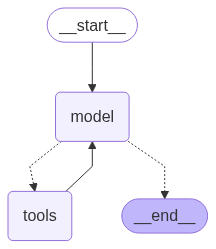

In [7]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
from langchain_core.messages import HumanMessage

input = {
    'messages': [
        HumanMessage(
            '미국의 제 30대 대통령이 사망했을 때 나이는 몇 살일까요?'
        )
    ]
}

for c in graph.stream(input):
    print(c)

{'model': {'messages': AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_smt2LXkWHSFUwym6dfhFN406', 'function': {'arguments': '{"query":"30th president of the United States death age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 117, 'total_tokens': 142, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--fba95f2d-1597-426c-b85e-34a81dc9a5e5-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': '30th president of the United States death age'}, 'id': 'call_smt2LXkWHSFUwym6dfhFN406', 'type': 'tool_call'}], usage_metadata={'input_tokens': 117, 'output_tokens': 25, 'total_tokens': 1

/Users/hippoo/Desktop/SoMA/e-learning/langgraph/.venv/lib/python3.13/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: 'api' backend is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


{'tools': {'messages': [ToolMessage(content="Calvin Coolidge was the 30th president of the United States, serving from 1923 to 1929. A Republican lawyer from Massachusetts, he previously served as the\xa0... 6일 전 ... Calvin Coolidge was the 30th president of the United States (1923–29). Coolidge acceded to the presidency after the death in office of\xa0... 2019. 1. 16. ... During the afternoon and evening of Thursday, January 5, 1933 the nation was stunned to learn of the death in Northampton of Calvin Coolidge,\xa0... 2019. 1. 5. ... On this day in 1993, Calvin Coolidge, the nation's 30th president, died suddenly from coronary thrombosis at his home, The Beeches, in Northampton, Mass. He\xa0... The oldest president at the time of death was Jimmy Carter, who died at 100 years, 89 days. John F. Kennedy, assassinated at the age of 46 years, 177 days, was\xa0...", name='duckduckgo_search', id='3055666c-ae73-4abd-bd64-b5c7485c2398', tool_call_id='call_smt2LXkWHSFUwym6dfhFN406')]}}
{'model'

/Users/hippoo/Desktop/SoMA/e-learning/langgraph/.venv/lib/python3.13/site-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: 'api' backend is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


{'tools': {'messages': [ToolMessage(content="Calvin Coolidge was the 30th president of the United States, serving from 1923 to 1929. A Republican lawyer from Massachusetts, he previously served as the\xa0... 6일 전 ... Calvin Coolidge (born July 4, 1872, Plymouth, Vermont, U.S.—died January 5, 1933, Northampton, Massachusetts) was the 30th president of the\xa0... Birth Date. July 4, 1872 ; Death Date. January 5, 1933 ; Birth Place. Plymouth Notch, Vermont ; Education. Amherst College (graduated 1895) ; Religion. Born in Plymouth, Vermont, on July 4, 1872, Coolidge was the son of a village storekeeper. He graduated from Amherst College with honors, and entered law and\xa0... John Calvin Coolidge is born in Plymouth Notch, Vermont. 1875. April 15, Calvin's sister, Abigail Grace Coolidge (Abbie) is born. 1877.", name='duckduckgo_search', id='6edd2a19-8b2c-4c6a-9bf4-96a2e707c1be', tool_call_id='call_ZxZ9DfgS2gWhYl1UIfpI8XM5')]}}
{'model': {'messages': AIMessage(content='', additional_kwargs=

GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT